In [23]:
train_path = '/content/drive/MyDrive/DATASETS/BreastCancer1/train'
test_path = '/content/drive/MyDrive/DATASETS/BreastCancer1/test'

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras import models,layers
import os
import glob
import cv2
from keras.applications.vgg16 import VGG16

In [25]:
print(os.listdir("/content/drive/MyDrive/DATASETS/BreastCancer1"))
print(glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/train/*'))
print(glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/test/*'))
classes = ["NoCancer","Cancer"]

['test', 'train']
['/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer', '/content/drive/MyDrive/DATASETS/BreastCancer1/train/1_Cancer']
['/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer', '/content/drive/MyDrive/DATASETS/BreastCancer1/test/1_Cancer']


In [26]:
train_images=[]
train_labels=[]
for directory_path in glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/train/*'):
  label=directory_path.split("//")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path,"*.png")):
    print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(50,50))
    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    train_images.append(img)
    train_labels.append(label)

/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x651_y1451_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1201_y1701_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x1651_y1851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1951_y851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x2551_y1551_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x851_y1001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x951_y2001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1001_y2001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x1251_y1751_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x801

In [27]:
test_images=[]
test_labels=[]
for directory_path in glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/test/*'):
  label=directory_path.split("//")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path,"*.png")):
    print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(50,50))
    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    test_images.append(img)
    test_labels.append(label)

/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x351_y651_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x951_y2351_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x751_y2101_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x201_y1201_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x851_y1201_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1801_y2101_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1551_y651_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1401_y851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x901_y951_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x851_y951_class0.png


In [28]:
train_images=np.asarray(train_images)
train_labels=np.asarray(train_labels)
test_images=np.asarray(test_images)
test_labels=np.asarray(test_labels)
train_images.shape

(200, 50, 50, 3)

In [29]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)

In [30]:
test_labels_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
x_train,y_train,x_test,y_test=train_images,train_labels_encoded,test_images,test_labels_encoded

In [32]:
x_train.shape

(200, 50, 50, 3)

'/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer'

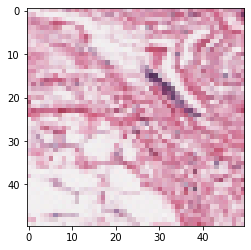

In [33]:
plt.imshow(x_test[2])
test_labels[2]

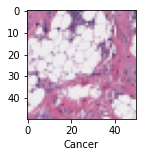

In [34]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(x_train, y_train, 100)

In [35]:
#x_train_flatten=x_train.reshape(len(x_train),224*224,3)
#print("After Flattening the shape of x_train is : ",x_train_flatten.shape)
#x_test_flatten=x_test.reshape(len(x_test),224*224,3)
#print("After Flattening the shape of x_test is : ",x_test_flatten.shape)

In [36]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [37]:
X_train[0]

array([[[0.57254902, 0.34509804, 0.5254902 ],
        [0.54117647, 0.29803922, 0.49411765],
        [0.75294118, 0.58823529, 0.71372549],
        ...,
        [0.75686275, 0.43137255, 0.59215686],
        [0.6745098 , 0.36470588, 0.54901961],
        [0.59215686, 0.34117647, 0.54509804]],

       [[0.56078431, 0.30980392, 0.50980392],
        [0.58039216, 0.29019608, 0.4745098 ],
        [0.38431373, 0.19215686, 0.39607843],
        ...,
        [0.73333333, 0.36470588, 0.54117647],
        [0.74117647, 0.36078431, 0.51372549],
        [0.61960784, 0.31372549, 0.46666667]],

       [[0.51372549, 0.31372549, 0.5254902 ],
        [0.68235294, 0.41960784, 0.59215686],
        [0.81176471, 0.45490196, 0.58039216],
        ...,
        [0.72156863, 0.38039216, 0.54901961],
        [0.77647059, 0.41960784, 0.58823529],
        [0.77647059, 0.4       , 0.56862745]],

       ...,

       [[0.82745098, 0.42745098, 0.56862745],
        [0.80392157, 0.42745098, 0.58431373],
        [0.87843137, 0

In [38]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [39]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 95ms/step - loss: 0.7010 - accuracy: 0.4800
Epoch 2/20
7/7 [==============================] - 1s 97ms/step - loss: 0.6944 - accuracy: 0.4950
Epoch 3/20
7/7 [==============================] - 1s 98ms/step - loss: 0.6731 - accuracy: 0.6150
Epoch 4/20
7/7 [==============================] - 1s 94ms/step - loss: 0.6295 - accuracy: 0.6600
Epoch 5/20
7/7 [==============================] - 1s 95ms/step - loss: 0.6366 - accuracy: 0.6350
Epoch 6/20
7/7 [==============================] - 1s 99ms/step - loss: 0.6388 - accuracy: 0.6500
Epoch 7/20
7/7 [==============================] - 1s 94ms/step - loss: 0.6231 - accuracy: 0.6350
Epoch 8/20
7/7 [==============================] - 1s 96ms/step - loss: 0.6154 - accuracy: 0.6900
Epoch 9/20
7/7 [==============================] - 1s 99ms/step - loss: 0.5685 - accuracy: 0.7200
Epoch 10/20
7/7 [==============================] - 1s 95ms/step - loss: 0.5645 - accuracy: 0.7250
Epoch 11/20
7/7 [============

In [40]:
cnn.evaluate(X_test,y_test)

1/1 [==============================] - 0s 172ms/step - loss: 0.4093 - accuracy: 0.7500


[0.40932363271713257, 0.75]

In [41]:
y_pred = cnn.predict(X_test)
y_pred

array([[0.799634  , 0.27063787],
       [0.8465618 , 0.2275405 ],
       [0.71713686, 0.3420755 ],
       [0.84589183, 0.22426173],
       [0.77537465, 0.30012816],
       [0.6570132 , 0.39386678],
       [0.40049314, 0.59618413],
       [0.334312  , 0.6566787 ],
       [0.714308  , 0.34462893],
       [0.3590103 , 0.6313245 ],
       [0.31945652, 0.6733626 ],
       [0.3346724 , 0.65392804],
       [0.26475057, 0.7201148 ],
       [0.54840916, 0.48078364],
       [0.27238142, 0.71390116],
       [0.349046  , 0.6411282 ],
       [0.5357113 , 0.49882445],
       [0.33669186, 0.64939755],
       [0.17281362, 0.8155997 ],
       [0.3124858 , 0.6724959 ]], dtype=float32)

In [42]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 0]

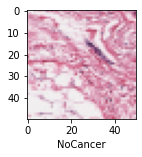

In [43]:
plot_sample(X_test, y_test,2)

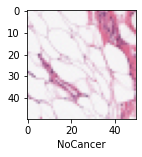

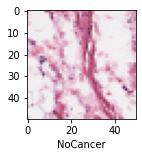

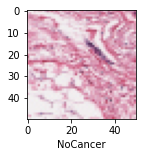

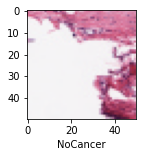

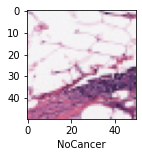

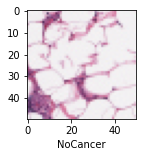

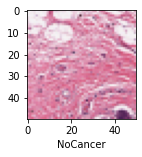

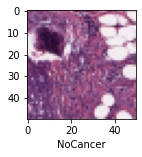

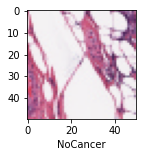

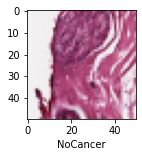

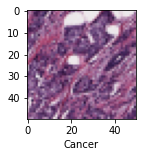

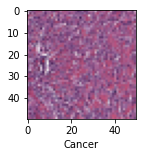

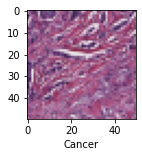

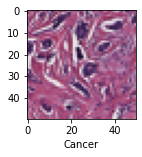

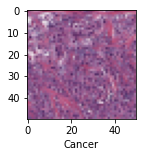

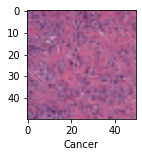

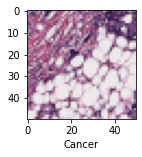

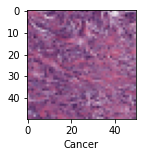

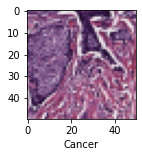

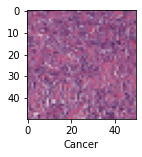

In [44]:
for i in range(len(y_pred)):
  plot_sample(x_test,y_test,i)

***Implementation of VGG16***

In [78]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [79]:
vgg16=VGG16(weights='imagenet',include_top=False,input_shape=(50,50,3))
vgg19=VGG19(weights='imagenet',include_top=False,input_shape=(50,50,3))

80150528/80134624 [==============================] - 1s 0us/step


In [88]:
for layer in vgg16.layers:
  layer.trainable=False
for layer in vgg19.layers:
  layer.trainable=False

In [89]:
folders=glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/train/*')
x=Flatten()(vgg16.output)
x1=Flatten()(vgg19.output)
prediction=Dense(len(folders),activation='softmax')(x)
prediction1=Dense(len(folders),activation='softmax')(x1)

In [90]:
model=Model(inputs=vgg16.input,outputs=prediction)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [91]:
model1=Model(inputs=vgg19.input,outputs=prediction1)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [70]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [92]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [93]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [94]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS/BreastCancer1/train',target_size=(50,50),batch_size=32,class_mode='categorical')
testing_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS/BreastCancer1/test',target_size=(50,50),batch_size=32,class_mode='categorical')

Found 200 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [74]:
r=model.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
7/7 [==============================] - 26s 3s/step - loss: 1.0666 - accuracy: 0.4400 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 24s 3s/step - loss: 0.7100 - accuracy: 0.4800 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 24s 4s/step - loss: 0.7100 - accuracy: 0.5000 - val_loss: 0.6831 - val_accuracy: 0.6000
Epoch 4/20
7/7 [==============================] - 24s 3s/step - loss: 0.6941 - accuracy: 0.5200 - val_loss: 0.6857 - val_accuracy: 0.5000
Epoch 5/20
7/7 [==============================] - 24s 3s/step - loss: 0.7018 - accuracy: 0.5200 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 24s 3s/step - loss: 0.6991 - accuracy: 0.5500 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 7/20
7/7 [==============================] - 25s 3s/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 8/20
7/7 [==================

In [95]:
r1=model1.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
7/7 [==============================] - 8s 1s/step - loss: 0.7679 - accuracy: 0.4300 - val_loss: 0.8166 - val_accuracy: 0.3500
Epoch 2/20
7/7 [==============================] - 7s 1s/step - loss: 0.7037 - accuracy: 0.5450 - val_loss: 0.6750 - val_accuracy: 0.6000
Epoch 3/20
7/7 [==============================] - 7s 1s/step - loss: 0.6537 - accuracy: 0.6300 - val_loss: 0.6455 - val_accuracy: 0.6500
Epoch 4/20
7/7 [==============================] - 7s 1s/step - loss: 0.6205 - accuracy: 0.6900 - val_loss: 0.6357 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 7s 1s/step - loss: 0.5976 - accuracy: 0.7400 - val_loss: 0.5398 - val_accuracy: 0.8500
Epoch 6/20
7/7 [==============================] - 7s 1s/step - loss: 0.5753 - accuracy: 0.7500 - val_loss: 0.5364 - val_accuracy: 0.8500
Epoch 7/20
7/7 [==============================] - 7s 1s/step - loss: 0.5477 - accuracy: 0.7600 - val_loss: 0.4617 - val_accuracy: 0.9000
Epoch 8/20
7/7 [=========================

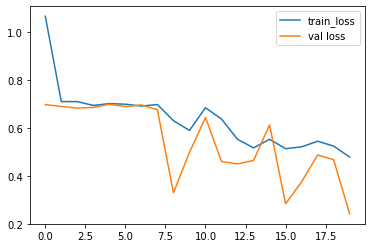

<Figure size 432x288 with 0 Axes>

In [98]:
#VGG16
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

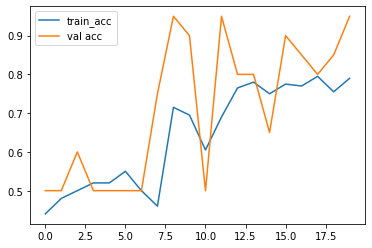

<Figure size 432x288 with 0 Axes>

In [99]:
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

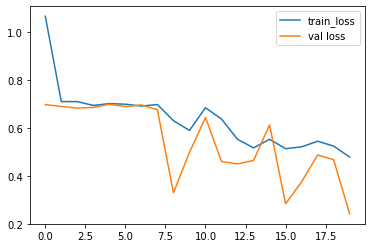

<Figure size 432x288 with 0 Axes>

In [96]:
#VGG19
plt.plot(r1.history['loss'],label='train_loss')
plt.plot(r1.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

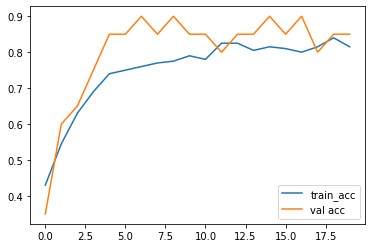

<Figure size 432x288 with 0 Axes>

In [97]:
plt.plot(r1.history['accuracy'],label='train_acc')
plt.plot(r1.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')